In [2]:
import pandas as pd
import numpy as np

In [3]:
crime_sort = pd.read_hdf('crime.h5', 'crime') \
            .set_index('REPORTED_DATE') \
            .sort_index() 

In [4]:
crime_sort.resample('W')

In [5]:
weekly_crimes = crime_sort.resample('W').size() 
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [6]:
len(crime_sort.loc[:'2012-1-8'])

877

In [7]:
len(crime_sort.loc['2012-1-9':'2012-1-15'])

1071

In [8]:
crime_sort.resample('W-THU').size().head()

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
Freq: W-THU, dtype: int64

In [9]:
weekly_crimes_gby = crime_sort.groupby(pd.Grouper(freq='W')).size() 
weekly_crimes_gby.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [10]:
weekly_crimes.equals(weekly_crimes_gby)

True

In [12]:
r = crime_sort.resample('W') 
resample_methods = [attr for attr in dir(r) if attr[0].islower()] 
print(resample_methods)

['agg', 'aggregate', 'apply', 'asfreq', 'ax', 'backfill', 'bfill', 'count', 'ffill', 'fillna', 'first', 'get_group', 'groups', 'indices', 'interpolate', 'last', 'max', 'mean', 'median', 'min', 'ndim', 'nearest', 'ngroups', 'nunique', 'obj', 'ohlc', 'pad', 'pipe', 'plot', 'prod', 'quantile', 'sem', 'size', 'std', 'sum', 'transform', 'var']


In [14]:
crime = pd.read_hdf('crime.h5', 'crime') 
weekly_crimes2 = crime.resample('W', on='REPORTED_DATE').size() 
weekly_crimes2.equals(weekly_crimes)

True

In [15]:
weekly_crimes_gby2 = crime.groupby(pd.Grouper(key='REPORTED_DATE', freq='W')).size() 
weekly_crimes_gby2.equals(weekly_crimes_gby)

True

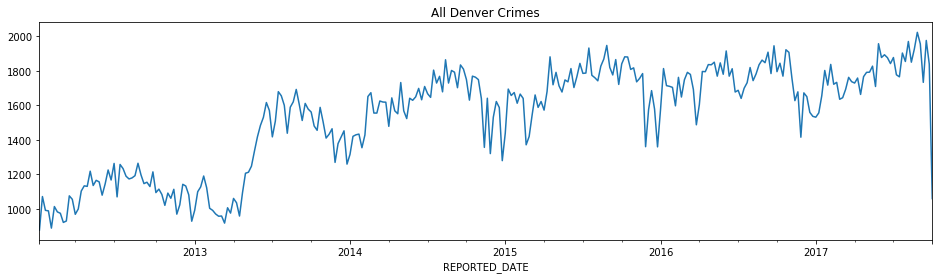

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

weekly_crimes.plot(figsize=(16,4), title='All Denver Crimes')